In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.color_palette("Set2")
plt.rcParams["figure.figsize"] = (15,8)

In [3]:
df = pd.read_csv('russian_alcohol_consumption.csv')

In [4]:
df.dropna(subset=['wine'], inplace=True)
len(df)

1552

In [5]:
numerical_cols = df.select_dtypes(include=['float', 'int'])
numerical_cols.drop(columns='year', inplace=True)

df['total'] = numerical_cols.sum(axis=1)
df

C:\Users\LETPC\.virtualenvs\thánh_kinh-HTNzGKfT\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,region,wine,beer,vodka,champagne,brandy,total
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5


## Feature extraction

### Features to extract from regions
- Wine consumption
- proportion of alchohol
- proportion of alcohol >= 2010


In [6]:
def append_share_col(df):
    alcohol_list = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
    for i in alcohol_list:
        name_col = i+"_share"
        df[name_col] = df[i] / df['total']

    return df
    

In [7]:
df = append_share_col(df)
df

,year,region,wine,beer,vodka,champagne,brandy,total,wine_share,beer_share,vodka_share,champagne_share,brandy_share
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5,0.131034,0.606897,0.234483,0.020690,0.006897
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0,0.094286,0.548571,0.322857,0.031429,0.002857
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7,0.050360,0.508393,0.414868,0.016787,0.009592
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3,0.157509,0.388278,0.428571,0.014652,0.010989
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4,0.092357,0.573248,0.302548,0.025478,0.006369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1,0.089127,0.754011,0.137255,0.012478,0.007130
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4,0.074427,0.648855,0.221374,0.034351,0.020992
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9,0.060649,0.791255,0.115656,0.025388,0.007052
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5,0.049180,0.828415,0.089617,0.018579,0.014208


In [8]:
df_total_wine_by_region = df.groupby('region')[['wine', 'beer', 'vodka', 'champagne', 'brandy']].sum()
df_total_wine_by_region['total'] = df_total_wine_by_region.sum(axis=1)
df_total_wine_by_region

,wine,beer,vodka,champagne,brandy,total
region,,,,,,
Altai Krai,60.31,919.09,179.85,22.94,4.50,1186.69
Altai Republic,98.61,697.76,183.99,17.76,4.82,1002.94
Amur Oblast,99.21,1014.17,270.12,21.20,7.54,1412.24
Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54,1436.20
Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86,1324.00
...,...,...,...,...,...,...
Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44
Voronezh Oblast,88.12,1043.31,188.41,28.50,7.64,1355.98
Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63


In [9]:
df_total_wine_by_region = append_share_col(df_total_wine_by_region)
df_total_wine_by_region

,wine,beer,vodka,champagne,brandy,total,wine_share,beer_share,vodka_share,champagne_share,brandy_share
region,,,,,,,,,,,
Altai Krai,60.31,919.09,179.85,22.94,4.50,1186.69,0.050822,0.774499,0.151556,0.019331,0.003792
Altai Republic,98.61,697.76,183.99,17.76,4.82,1002.94,0.098321,0.695715,0.183451,0.017708,0.004806
Amur Oblast,99.21,1014.17,270.12,21.20,7.54,1412.24,0.070250,0.718129,0.191271,0.015012,0.005339
Arkhangelsk Oblast,164.73,893.70,330.24,30.99,16.54,1436.20,0.114699,0.622267,0.229940,0.021578,0.011517
Astrakhan Oblast,84.92,1039.21,176.64,16.37,6.86,1324.00,0.064139,0.784902,0.133414,0.012364,0.005181
...,...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44,0.098061,0.706485,0.180996,0.009013,0.005444
Voronezh Oblast,88.12,1043.31,188.41,28.50,7.64,1355.98,0.064986,0.769414,0.138947,0.021018,0.005634
Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63,0.051584,0.778185,0.146563,0.014428,0.009240


In [10]:
df_feature = df_total_wine_by_region[['wine', 'total', 'wine_share', 'beer_share', 'vodka_share', 'champagne_share', 'brandy_share']]
df_feature

,wine,total,wine_share,beer_share,vodka_share,champagne_share,brandy_share
region,,,,,,,
Altai Krai,60.31,1186.69,0.050822,0.774499,0.151556,0.019331,0.003792
Altai Republic,98.61,1002.94,0.098321,0.695715,0.183451,0.017708,0.004806
Amur Oblast,99.21,1412.24,0.070250,0.718129,0.191271,0.015012,0.005339
Arkhangelsk Oblast,164.73,1436.20,0.114699,0.622267,0.229940,0.021578,0.011517
Astrakhan Oblast,84.92,1324.00,0.064139,0.784902,0.133414,0.012364,0.005181
...,...,...,...,...,...,...,...
Vologda Oblast,177.24,1807.44,0.098061,0.706485,0.180996,0.009013,0.005444
Voronezh Oblast,88.12,1355.98,0.064986,0.769414,0.138947,0.021018,0.005634
Yamalo-Nenets Autonomous Okrug,100.93,1956.63,0.051584,0.778185,0.146563,0.014428,0.009240


In [11]:
wine_2010 = df[df.year >= 2010]
wine_2010 = wine_2010.set_index('year')
wine_2010.groupby('region')['wine'].sum()
wine_2010.groupby('region')['wine'].sum()

region
Altai Krai                        31.11
Altai Republic                    34.21
Amur Oblast                       45.61
Arkhangelsk Oblast                70.73
Astrakhan Oblast                  34.22
                                  ...  
Vologda Oblast                    64.64
Voronezh Oblast                   43.92
Yamalo-Nenets Autonomous Okrug    40.23
Yaroslavl Oblast                  68.27
Zabaykalsky Krai                  45.52
Name: wine, Length: 83, dtype: float64

In [12]:
df_feature['wine_2010'] = wine_2010.groupby('region')['wine'].sum()
df_feature['total_2010'] = wine_2010.groupby('region')['wine'].sum()
df_feature

C:\Users\LETPC\AppData\Local\Temp/ipykernel_7648/667709799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['wine_2010'] = wine_2010.groupby('region')['wine'].sum()
C:\Users\LETPC\AppData\Local\Temp/ipykernel_7648/667709799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature['total_2010'] = wine_2010.groupby('region')['wine'].sum()


,wine,total,wine_share,beer_share,vodka_share,champagne_share,brandy_share,wine_2010,total_2010
region,,,,,,,,,
Altai Krai,60.31,1186.69,0.050822,0.774499,0.151556,0.019331,0.003792,31.11,31.11
Altai Republic,98.61,1002.94,0.098321,0.695715,0.183451,0.017708,0.004806,34.21,34.21
Amur Oblast,99.21,1412.24,0.070250,0.718129,0.191271,0.015012,0.005339,45.61,45.61
Arkhangelsk Oblast,164.73,1436.20,0.114699,0.622267,0.229940,0.021578,0.011517,70.73,70.73
Astrakhan Oblast,84.92,1324.00,0.064139,0.784902,0.133414,0.012364,0.005181,34.22,34.22
...,...,...,...,...,...,...,...,...,...
Vologda Oblast,177.24,1807.44,0.098061,0.706485,0.180996,0.009013,0.005444,64.64,64.64
Voronezh Oblast,88.12,1355.98,0.064986,0.769414,0.138947,0.021018,0.005634,43.92,43.92
Yamalo-Nenets Autonomous Okrug,100.93,1956.63,0.051584,0.778185,0.146563,0.014428,0.009240,40.23,40.23


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_num = np.arange(2,11)
inertia_list = []

In [14]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_feature), index=df_feature.index, columns=df_feature.columns)
scaled_df.dropna(inplace=True)

In [15]:
scaled_df.loc[:, "wine"]

region
Altai Krai                       -1.124180
Altai Republic                   -0.138388
Amur Oblast                      -0.122945
Arkhangelsk Oblast                1.563454
Astrakhan Oblast                 -0.490751
                                    ...   
Vologda Oblast                    1.885445
Voronezh Oblast                  -0.408387
Yamalo-Nenets Autonomous Okrug   -0.078675
Yaroslavl Oblast                  0.841226
Zabaykalsky Krai                  0.652047
Name: wine, Length: 83, dtype: float64

In [18]:
scaled_df

,wine,total,wine_share,beer_share,vodka_share,champagne_share,brandy_share,wine_2010,total_2010
region,,,,,,,,,
Altai Krai,-1.124180,-0.285964,-0.941051,0.706275,-0.394271,-0.059741,-0.784999,-0.803943,-0.803943
Altai Republic,-0.138388,-0.724009,0.353336,-0.204322,0.190178,-0.234350,-0.608222,-0.616448,-0.616448
Amur Oblast,-0.122945,0.251730,-0.411619,0.054742,0.333473,-0.524406,-0.515255,0.073053,0.073053
Arkhangelsk Oblast,1.563454,0.308848,0.799639,-1.053237,1.042068,0.181946,0.561899,1.592372,1.592372
Astrakhan Oblast,-0.490751,0.041372,-0.578152,0.826514,-0.726714,-0.809216,-0.542765,-0.615843,-0.615843
...,...,...,...,...,...,...,...,...,...
Vologda Oblast,1.885445,1.193855,0.346262,-0.079832,0.145204,-1.169730,-0.496924,1.224034,1.224034
Voronezh Oblast,-0.408387,0.117610,-0.555065,0.647504,-0.625315,0.121729,-0.463770,-0.029163,-0.029163
Yamalo-Nenets Autonomous Okrug,-0.078675,1.549512,-0.920298,0.748879,-0.485761,-0.587202,0.165015,-0.252343,-0.252343


In [47]:
def kmean_elbowplot(df):
    inertia_list = []
    for num in cluster_num:
        kmeans = KMeans(n_clusters=num, random_state=random.choice(range(1,1000000)))
        kmeans.fit(df)
        inertia_list.append(kmeans.inertia_)
    plt.plot(cluster_num, inertia_list, marker="o")
    plt.title("Elbow plot to measure inertia of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(axis="x")
    sns.despine()
    plt.show()



In [23]:
import random

def kmean_scatterplot(x, y, df):
    fig, axes = plt.subplots(3,3) 
    for num, ax in zip(cluster_num, axes.ravel()):
        kmeans = KMeans(n_clusters = num, 
                        random_state = random.choice(range(1,1000000))) 
        # bắt buộc phải random state - để tránh random-state degradation

        kmeans.fit(df)
        df_k_test = df.copy()
        df_k_test[f"cluster(k={num})"] = kmeans.labels_
        k_palette = sns.color_palette("bright")[:len(set(kmeans.labels_))]
        sns.scatterplot(x=x, y=y, data=df_k_test,
                        style=f"cluster(k={num})",
                        hue=f"cluster(k={num})",
                        ax=ax, palette=k_palette, legend=False, alpha=.5)
        sns.despine()
        ax.grid(None)
        ax.set(xlabel="", ylabel=f"k={num}")


    fig.text(0.5, 0.04, x, ha = 'center')
    fig.text(0.04, 0.5, y, ha = 'center')
    fig.suptitle("Scatter plot of kmeans clustering")
    plt.show()

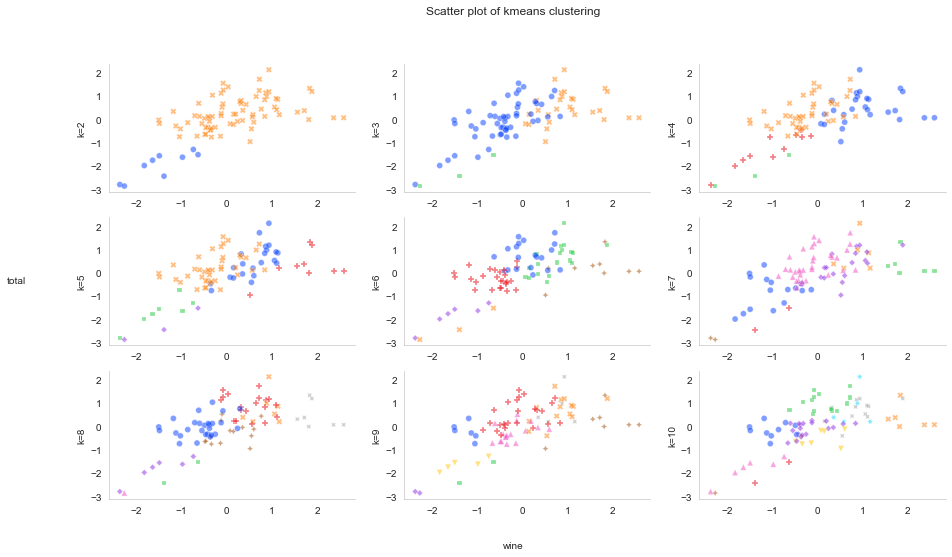

In [29]:
kmean_scatterplot('wine', 'total', scaled_df)

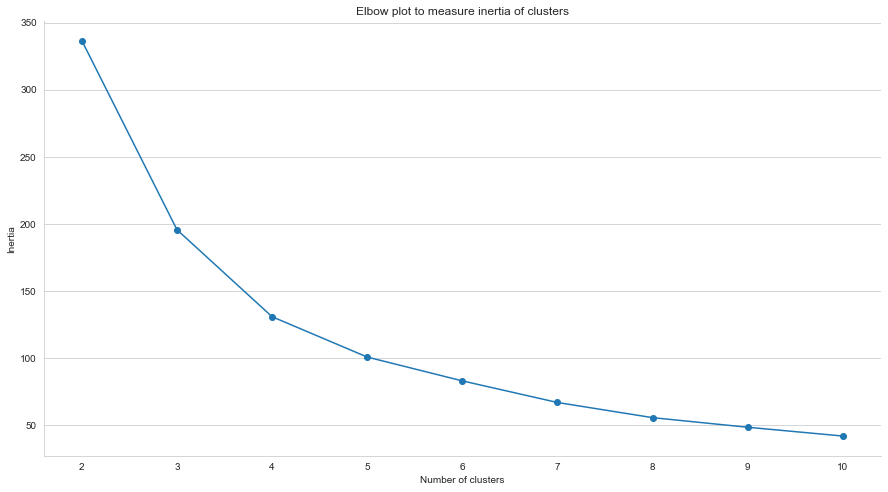

In [56]:
kmean_elbowplot(pca_features)

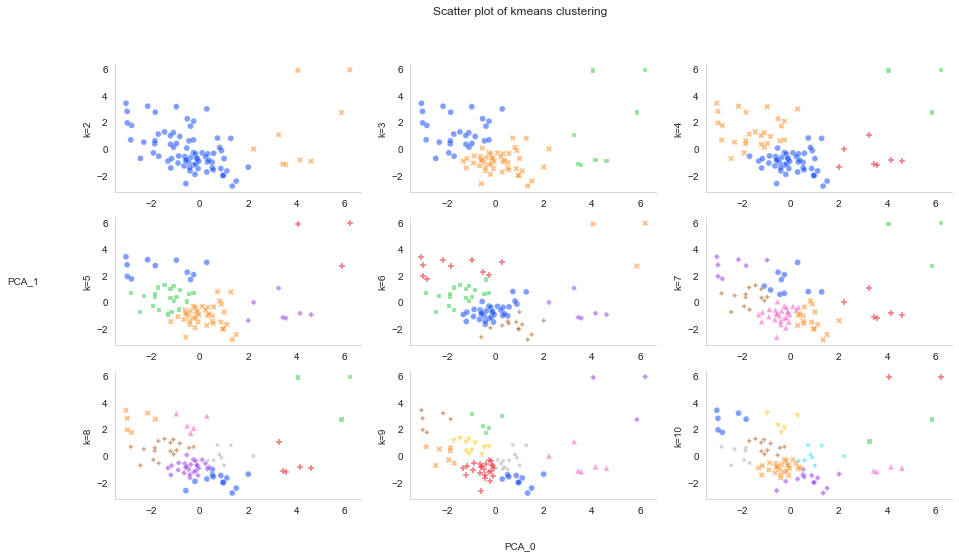

In [57]:
kmean_scatterplot("PCA_0", "PCA_1", pca_features)

In [114]:
n_cluster = 10
k_neighbor = 4

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_cluster)
pca_features = pd.DataFrame(pca.fit_transform(scaled_df), 
							index=scaled_df.index,
	                        columns=['PCA_' + str(n) for n in range(n_cluster)])

kmean_3 = KMeans(n_clusters = k_neighbor, random_state = 21)
kmean_3.fit(pca_features)
scaled_df["cluster"] = kmean_3.labels_
st_peter_cluster = int(scaled_df.query("region == 'Saint Petersburg'")["cluster"].values)


In [88]:
pca_features

,PCA_0,PCA_1,PCA_2
region,,,
Altai Krai,-1.916151,-0.933873,-0.062127
Altai Republic,-1.079866,0.214638,-0.842894
Amur Oblast,-0.200123,-0.523409,-0.698411
Arkhangelsk Oblast,3.178683,1.535598,-0.265195
Astrakhan Oblast,-1.276868,-1.431638,-0.154344
...,...,...,...
Vologda Oblast,3.098669,-0.726441,-0.680338
Voronezh Oblast,-0.648287,-0.933204,0.365789
Yamalo-Nenets Autonomous Okrug,-0.309718,-1.548969,0.481244


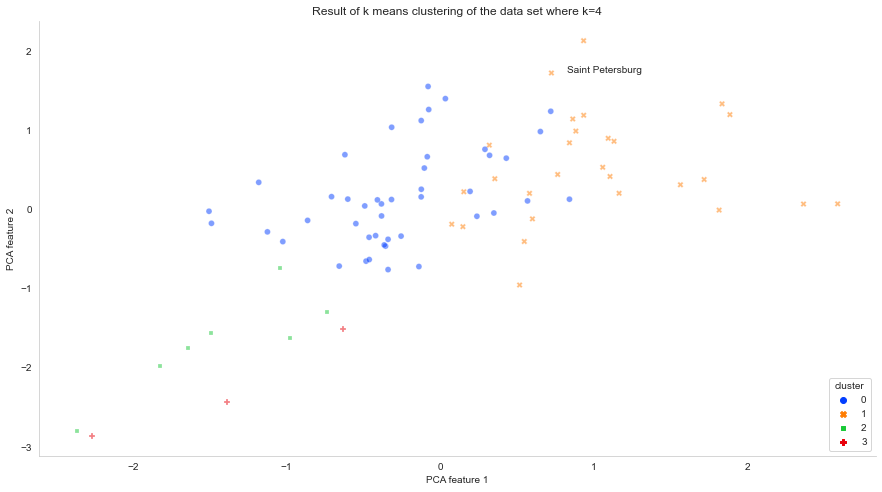

In [139]:
# Visualising to ensure the results make sense
ax = plt.gca()
sns.scatterplot(x="wine", 
                y="total", 
                data = scaled_df, 
                style="cluster", 
                hue="cluster", 
                palette = sns.color_palette("bright")[:4], 
                alpha=.5)
sns.despine()
plt.grid(None)
plt.title("Result of k means clustering of the data set where k=4")
plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.legend(loc="lower right", title="cluster")

# Labelling Saint Petersburg
st_peter_pca_1 = scaled_df.query("region == 'Saint Petersburg'").wine.values
st_peter_pca_2 = scaled_df.query("region == 'Saint Petersburg'").total.values
plt.annotate("Saint Petersburg", xy = (st_peter_pca_1, st_peter_pca_2), xytext=(st_peter_pca_1+.1, st_peter_pca_2))
plt.show()

C:\Users\LETPC\AppData\Local\Temp/ipykernel_7648/2156365091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['color_'] = top_10.euclid.apply(lambda x: "tab:blue" if x <= top_10.euclid.quantile(0.5) else "tab:orange")


,PCA_0,PCA_1,PCA_2,euclid,color_
region,,,,,
Republic of Dagestan,-2.401839,8.225830,-2.290856,73.433116,tab:orange
Chukotka Autonomous Okrug,-0.637538,7.065951,1.033684,50.334122,tab:orange
Sevastopol,-3.457608,5.417012,3.498869,41.299066,tab:orange
Republic of Karelia,4.452058,1.447478,-0.843905,21.916012,tab:orange
Republic of Crimea,-4.411462,1.532800,2.043683,21.810474,tab:orange
Novgorod Oblast,4.155817,0.972283,-0.358702,18.216151,tab:blue
Republic of North Ossetia-Alania,-4.027910,1.362435,-0.252002,18.080291,tab:blue
Nenets Autonomous Okrug,3.633645,1.744305,-0.020206,16.245979,tab:blue
Karachay-Cherkess Republic,-3.710784,0.740927,-1.352687,14.318894,tab:blue


In [ ]:
from sklearn.decomposition import PCA

n_comp = 2
pca = PCA(n_components=n_comp)
pca_features = pd.DataFrame(pca.fit_transform(scaled_df), 
							index=scaled_df.index,
	                        columns=['PCA_' + str(n) for n in range(n_comp)])

pca_features

,PCA_0,PCA_1
region,,
Altai Krai,1.119657,-1.681192
Altai Republic,0.899785,-0.149551
Amur Oblast,-0.258291,-0.303995
Arkhangelsk Oblast,-1.836690,2.736885
Astrakhan Oblast,0.295294,-1.756314
...,...,...
Vologda Oblast,-2.852194,0.659170
Voronezh Oblast,-0.038569,-0.945523
Yamalo-Nenets Autonomous Okrug,-0.644080,-1.302553


C:\Users\LETPC\AppData\Local\Temp/ipykernel_7648/1093808730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['color_'] = top_10.euclid.apply(lambda x: "tab:blue" if x <= top_10.euclid.quantile(0.5) else "tab:orange")
C:\Users\LETPC\.virtualenvs\thánh_kinh-HTNzGKfT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


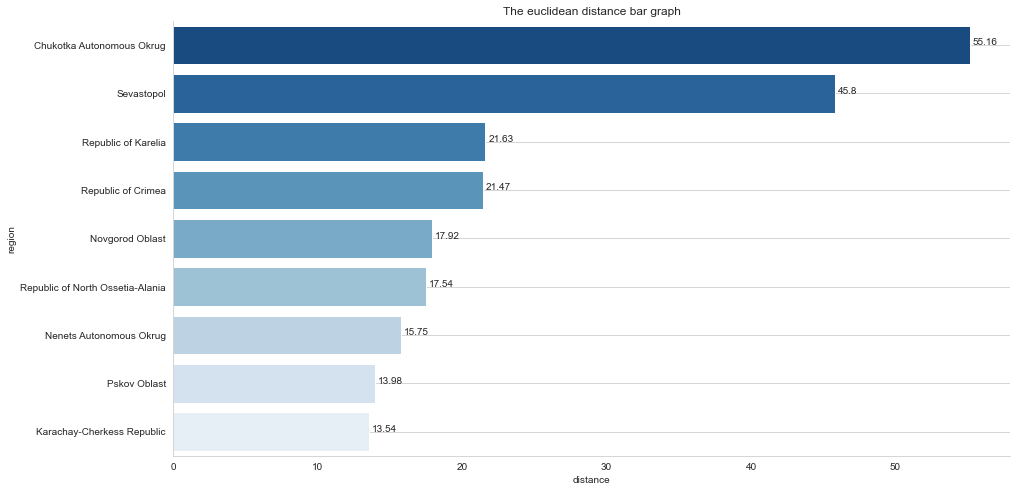

In [152]:
# create euclid distance column
pca_features = pca_features.assign(euclid = lambda x: x['PCA_0']**2 + x['PCA_1']**2)
pca_features = pca_features.sort_values(by='euclid', ascending=False)
top_10 = pca_features[:10]

# plot the top_10 bar graph
ax = sns.barplot( 
              "euclid",
              "region",
              orient='h',
              palette = 'Blues_r',
              data=top_10.iloc[1:].reset_index())
plt.grid(None)
plt.title(f"The euclidean distance bar graph")
plt.xlabel("distance")

# Annotating the distance
for x, y in zip(top_10.euclid[1:], range(0, 10)):
    plt.text(x+.2, y, round(x, 2))
sns.despine()
plt.show()

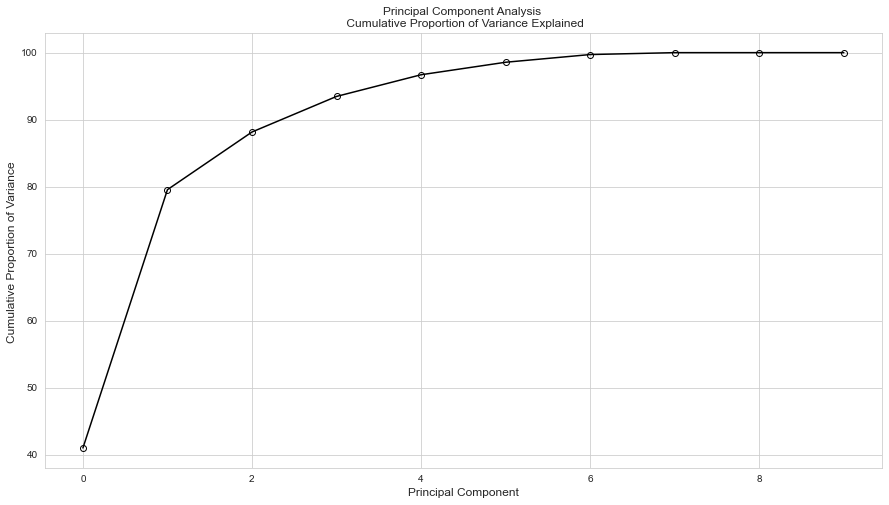

In [116]:
# Assign variance explained
var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()